In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from data_processing_functions import parameter_tuning_read_and_mean
# csv_path = "/home/jens/masterData/AlgorithmTuner/TunedParameters/BL/bl_5_5_AlgorithmTunerData-data.csv"
# tested_parameter = "BL/Score Threshold"
csv_path = "/home/jens/masterData/AlgorithmTuner/TunedParameters/BL/bl_5_5_AlgorithmTunerData-data.csv"
tested_parameter = "BL/Score Threshold"


df = pd.read_csv(csv_path,usecols=["algName","objName",tested_parameter,"tp","tn","fp","fn","f1","precision","recall","accuracy"],dtype={"algName":"category","objName":"category"})
df = df.groupby(["algName","objName",tested_parameter]).sum().reset_index()
df["precision"]=df["tp"]/(df["tp"]+df["fp"])
df["recall"]=df["tp"]/(df["tp"]+df["fn"])
df["f1"]=2*df["tp"]/(2*df["tp"]+df["fn"]+df["fp"])
df["accuracy"]=(df["tp"]+df["tn"])/(df["tp"]+df["tn"]+df["fp"]+df["fn"])
df.head()

,algName,objName,BL/Score Threshold,tp,tn,fp,fn,precision,recall,accuracy,f1
0,BL,AngleTubes,10.00,349,0,211,0,0.623214,1.0,0.623214,0.767877
1,BL,AngleTubes,10.25,349,0,211,0,0.623214,1.0,0.623214,0.767877
2,BL,AngleTubes,10.50,349,0,211,0,0.623214,1.0,0.623214,0.767877
3,BL,AngleTubes,10.75,349,3,208,0,0.626571,1.0,0.628571,0.770419
4,BL,AngleTubes,11.00,349,5,206,0,0.628829,1.0,0.632143,0.772124


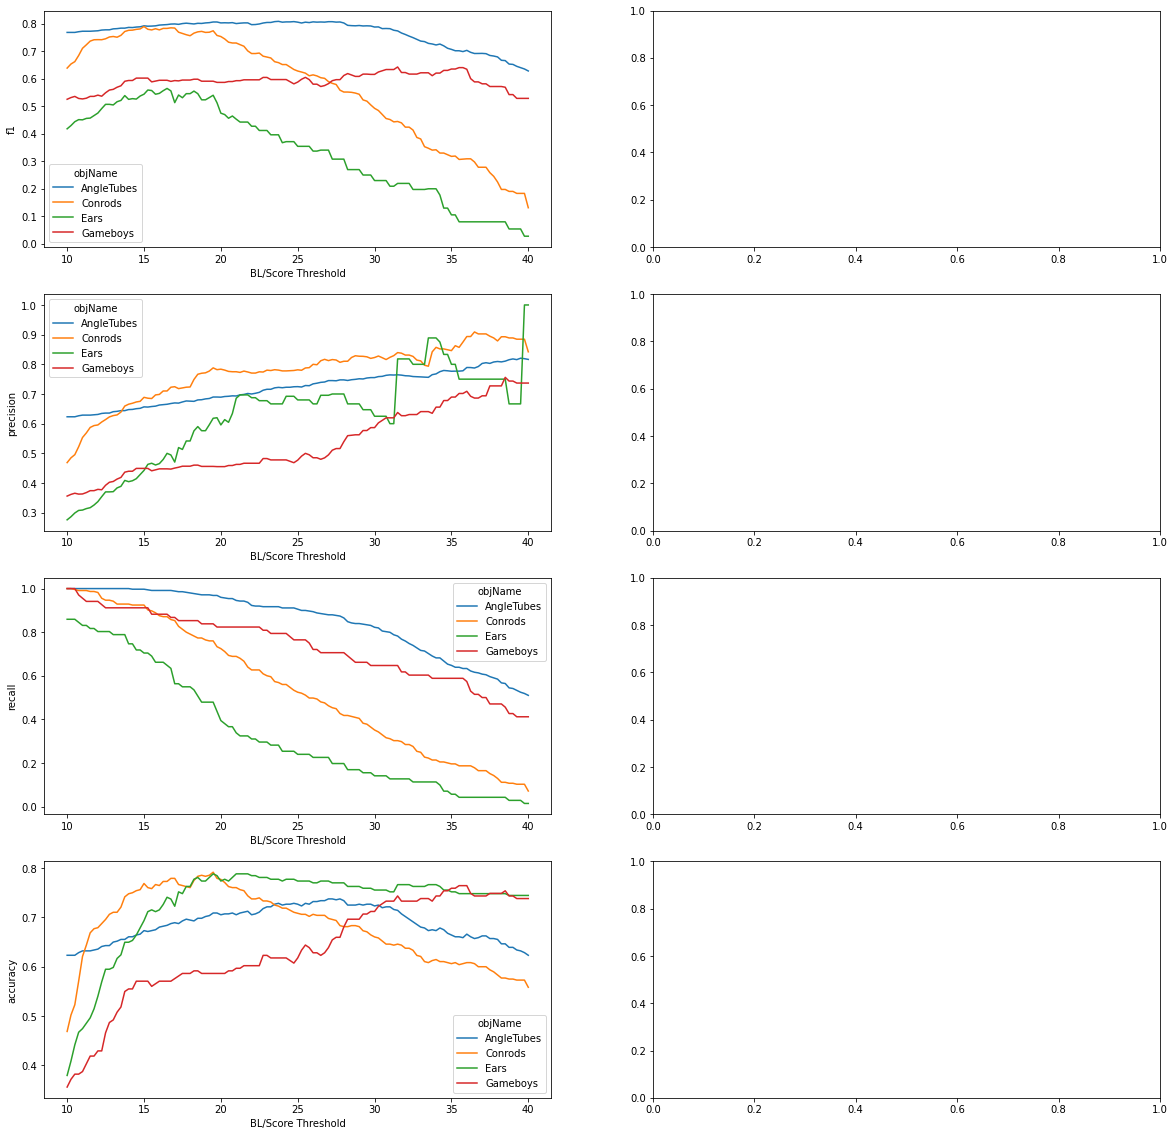

In [2]:

validation_measure = ["f1","precision","recall","accuracy"]
fig,axes = plt.subplots(len(validation_measure),2,figsize=(len(validation_measure)*5,len(validation_measure)*5),sharex = False)
for ax,vm in zip(axes[:,0],validation_measure):
    sns.lineplot(x=tested_parameter,y=vm,hue="objName",data=df,ax=ax)

plt.show()

In [5]:
tuning_measure = "f1"
max_idx = df.groupby(["algName","objName"])[tuning_measure].idxmax().to_numpy()
for index, row in df.iloc[max_idx,:].iterrows():
    print("{},{},{},{}".format(row["objName"],row["algName"],tested_parameter[len(row["algName"])+1:],row[tested_parameter]))

AngleTubes,BL,Score Threshold,23.75
Conrods,BL,Score Threshold,15.0
Ears,BL,Score Threshold,16.5
Gameboys,BL,Score Threshold,31.5


In [6]:
tuning_measure = "f1"

#Mean
max_idx = df_mean.groupby(["algName","objName"])[tuning_measure].idxmax().to_numpy()
for index, row in df_mean.iloc[max_idx,:].iterrows():
    print("{},{},{},{}".format(row["objName"],row["algName"],tested_parameter[len(row["algName"])+1:],row[tested_parameter]))

#Standart deviation
max_idx = df_std.groupby(["algName","objName"])[tuning_measure].idxmax().to_numpy()
for index, row in df_std.iloc[max_idx,:].iterrows():
    print("{},{},{},{}".format(row["objName"],row["algName"],tested_parameter[len(row["algName"])+1:],row[tested_parameter]))

NameError: name 'df_mean' is not defined